## Table of Contents
- <a href = "#intro"> Introduction </a>
    - <a href = "#imports"> Notebook Imports </a>
    - <a href = "#constants"> Constants </a>
    - <a href = "#functions"> Functions </a>
- <a href = "#wrangling">Data Wrangling</a>
    - <a href = "#gathering"> Data Gathering </a>
    - <a href = "#assessing"> Data Assessing </a>
    - <a href = "#cleaning"> Data Cleaning </a>
    - <a href = "#storing"> Data Storing </a>
- <a href = "#analysis"> Data Exploration and Visualization </a>
    - <a href = "#univariate">Univariate Exploration</a>
    - <a href = "#bivariate">Bivariate Exploration</a>
    - <a href = "#multivariate">Multivariate Exploration</a>
- <a href = "#conclusions"> Conclusions </a>

# Prosper Loan Dataset
## by Nwokocha Hannah

<a id='intro'></a>
## Introduction
This dataset is a financial dataset and is related to the borrowers, lenders, interest rates on different loans. Prosper or Prosper Marketplace Inc. is a San Francisco, California based company specializing in loans at low interest rates to the borrowers. In this dataset, I am analysing data from Prosper database and trying to find the pattern in the Prosper data. This may be tedious because of the sheer size of the dataset and the complicated nature of all the financial datasets. I am using Python, an advanced high level programming language for the analysis with some of its most popular graphic package matplotlib and seaborn.

The dataset is comprised of 81 variables and contains 113937 entries.

<a id='imports'></a>
### Notebook Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

<a id = "functions"></a>
### Functions

#### Convert datatypes

In [3]:
def converter(data, col, dtype):
    if dtype == 'date':
        if type(col) == list:
            for i in col:
                data[i] = pd.to_datetime(data[i])
        else:
            data[col] = pd.to_datetime(data[col])
    else:
        if type(col) == list:
            for i in col:
                data[i] = data[i].astype(dtype)
        else:
            data[col] = data[col].astype(dtype)

<a id = "wrangling"></a>
## Data Wrangling

<a id = "gathering"></a>
### Data Gathering

In [4]:
loan_df = pd.read_csv("ProsperLoanData.csv")

<a id='assessing'></a>
### Assessing Data

In [5]:
loan_df.shape

(113937, 81)

In [6]:
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [7]:
loan_df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [8]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [9]:
loan_df.isna().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

<a id='cleaning'></a>
### Cleaning Data

In [10]:
data = loan_df.copy()

#### Drop columns with extreme amount of Null values

#### Define
Drop columns with extreme amount of Null values

#### Code

In [11]:
large_na = [col for col in data.columns if data[col].isna().sum() >= 58848]
large_na

['CreditGrade',
 'ClosedDate',
 'GroupKey',
 'TotalProsperLoans',
 'TotalProsperPaymentsBilled',
 'OnTimeProsperPayments',
 'ProsperPaymentsLessThanOneMonthLate',
 'ProsperPaymentsOneMonthPlusLate',
 'ProsperPrincipalBorrowed',
 'ProsperPrincipalOutstanding',
 'ScorexChangeAtTimeOfListing',
 'LoanFirstDefaultedCycleNumber']

In [12]:
data.drop(large_na, axis = 1, inplace = True)

#### Test

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 69 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ListingKey                          113937 non-null  object 
 1   ListingNumber                       113937 non-null  int64  
 2   ListingCreationDate                 113937 non-null  object 
 3   Term                                113937 non-null  int64  
 4   LoanStatus                          113937 non-null  object 
 5   BorrowerAPR                         113912 non-null  float64
 6   BorrowerRate                        113937 non-null  float64
 7   LenderYield                         113937 non-null  float64
 8   EstimatedEffectiveYield             84853 non-null   float64
 9   EstimatedLoss                       84853 non-null   float64
 10  EstimatedReturn                     84853 non-null   float64
 11  ProsperRating (numeric)   

#### Replace Null values with Mean or Mode of their columns

#### Define
Replace Null values with Mean or Mode of their columns

#### Code

In [14]:
null_cols = [col for col in data.columns if data[col].isna().any() == True]
null_cols

['BorrowerAPR',
 'EstimatedEffectiveYield',
 'EstimatedLoss',
 'EstimatedReturn',
 'ProsperRating (numeric)',
 'ProsperRating (Alpha)',
 'ProsperScore',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'EmploymentStatusDuration',
 'CreditScoreRangeLower',
 'CreditScoreRangeUpper',
 'FirstRecordedCreditLine',
 'CurrentCreditLines',
 'OpenCreditLines',
 'TotalCreditLinespast7years',
 'InquiriesLast6Months',
 'TotalInquiries',
 'CurrentDelinquencies',
 'AmountDelinquent',
 'DelinquenciesLast7Years',
 'PublicRecordsLast10Years',
 'PublicRecordsLast12Months',
 'RevolvingCreditBalance',
 'BankcardUtilization',
 'AvailableBankcardCredit',
 'TotalTrades',
 'TradesNeverDelinquent (percentage)',
 'TradesOpenedLast6Months',
 'DebtToIncomeRatio']

In [15]:
for col in null_cols:
    if data[col].dtypes in ['float64', 'int64']:
        mean = data[col].mean()
        data[col].fillna(mean, inplace = True)
    else:
        mode = data[col].mode()[0]
        data[col].fillna(mode, inplace = True)

#### Test

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 69 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ListingKey                          113937 non-null  object 
 1   ListingNumber                       113937 non-null  int64  
 2   ListingCreationDate                 113937 non-null  object 
 3   Term                                113937 non-null  int64  
 4   LoanStatus                          113937 non-null  object 
 5   BorrowerAPR                         113937 non-null  float64
 6   BorrowerRate                        113937 non-null  float64
 7   LenderYield                         113937 non-null  float64
 8   EstimatedEffectiveYield             113937 non-null  float64
 9   EstimatedLoss                       113937 non-null  float64
 10  EstimatedReturn                     113937 non-null  float64
 11  ProsperRating (numeric)   

In [17]:
na_cols = [col for col in data.columns if data[col].isna().sum() > 0]
na_cols

[]

#### Erroneous Datatype

#### Define
Most column data types have to be corrected

#### Code

In [18]:
date = ["ListingCreationDate", "DateCreditPulled", "FirstRecordedCreditLine", "LoanOriginationDate"]
converter(data, date, "date")

In [19]:
string = ["ProsperRating (numeric)", "ProsperScore", "ListingCategory (numeric)", "LoanNumber"]
converter(data, string, int)
converter(data, string, object)

In [20]:
integer = ["EmploymentStatusDuration", "CreditScoreRangeLower", "CreditScoreRangeUpper", "CurrentCreditLines", 
           "OpenCreditLines", "TotalCreditLinespast7years", "InquiriesLast6Months", "TotalInquiries", "CurrentDelinquencies", 
           "AmountDelinquent", "DelinquenciesLast7Years", "PublicRecordsLast10Years", "PublicRecordsLast12Months", "TotalTrades",
           "TradesOpenedLast6Months", ]
converter(data, integer, "int64")

#### Test

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 69 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   ListingKey                          113937 non-null  object        
 1   ListingNumber                       113937 non-null  int64         
 2   ListingCreationDate                 113937 non-null  datetime64[ns]
 3   Term                                113937 non-null  int64         
 4   LoanStatus                          113937 non-null  object        
 5   BorrowerAPR                         113937 non-null  float64       
 6   BorrowerRate                        113937 non-null  float64       
 7   LenderYield                         113937 non-null  float64       
 8   EstimatedEffectiveYield             113937 non-null  float64       
 9   EstimatedLoss                       113937 non-null  float64       
 10  Estimate

In [22]:
pd.set_option('display.max_columns', None)
data.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
15552,E03E3386260568463C7DFA6,123401,2007-04-13 23:34:40.037,36,Defaulted,0.19730,0.1900,0.1850,0.168661,0.080306,0.096068,4,C,5,0,CA,Other,Self-employed,28,True,False,2007-04-13 21:25:37.313,740,759,2001-08-17,11,11,22,4,177.0,13,39,0,0,0,0,0,12540.000000,0.850000,2093.000000,21,0.950000,4,0.21,"$100,000+",True,9941.416667,2014338675646740612812F,311,83,13135,25000,2007-04-23,Q2 2007,6E843385581049518C8E9F0,916.40,9164.000,5571.51,3592.490,-94.52,0.00,19428.49,19428.49,0.0,1.0,0,0,0.0,191
17993,A9DB35191531487525577B9,511284,2011-06-13 20:28:51.980,36,Completed,0.30532,0.2699,0.2599,0.253400,0.112000,0.141400,3,D,6,7,FL,Computer Programmer,Employed,96,False,False,2011-06-13 20:28:43.000,660,679,1998-03-12,9,7,13,6,388.0,1,1,0,0,0,1,0,13355.000000,0.900000,1141.000000,13,1.000000,0,0.19,"$75,000-99,999",True,6437.500000,995736219255362229C16B3,0,33,50477,7000,2011-06-21,Q2 2011,57FC35173224021635EB9E0,285.74,9492.620,7000.00,2492.620,-92.35,0.00,0.00,0.00,0.0,1.0,0,0,0.0,109
33388,2F22337561813190542641D,69575,2006-12-02 21:01:10.220,36,Completed,0.24753,0.2400,0.2250,0.168661,0.080306,0.096068,4,C,5,0,CA,Professional,Not available,96,False,True,2006-11-21 12:53:38.933,560,579,1995-08-18,10,9,51,1,0.0,8,14,19,984,26,0,0,17598.706751,0.561309,11210.225447,23,0.885897,0,0.17,Not displayed,True,4583.333333,01B23375551189419A2164D,0,87,5300,3300,2006-12-08,Q4 2006,9DC13373656256800CE3821,24.36,4688.620,3300.00,1388.620,-28.71,-39.88,0.00,0.00,0.0,1.0,0,0,0.0,33
47855,33793425663589312650BE4,359637,2008-06-29 21:43:53.943,36,Completed,0.37453,0.3500,0.3400,0.168661,0.080306,0.096068,4,C,5,1,AL,Realtor,Full-time,24,False,False,2008-06-29 21:43:24.347,560,579,2002-08-23,12,11,18,6,330.0,0,5,0,0,1,0,0,11771.000000,1.030000,0.000000,13,0.640000,0,0.25,"$50,000-74,999",True,4333.333333,8E6A342673115687080900B,0,68,34006,3000,2008-07-11,Q3 2008,46353418445999882723038,0.00,4914.050,2879.57,2034.480,-54.63,-140.00,0.00,0.00,0.0,1.0,0,0,0.0,25
105269,63C23424479887915660E18,350556,2008-06-14 15:10:58.780,36,Completed,0.11898,0.1050,0.0950,0.168661,0.080306,0.096068,4,C,5,1,CA,Computer Programmer,Full-time,10,False,False,2008-06-06 20:20:28.053,680,699,1979-12-30,7,7,9,5,162.0,0,4,0,0,0,1,0,6418.000000,0.600000,4054.000000,9,1.000000,0,0.11,"$75,000-99,999",True,8165.166667,C8583424770810470AEF355,0,69,33236,4350,2008-06-24,Q2 2008,D2093366297109829CACE53,141.39,5087.380,4349.99,737.390,-70.23,0.00,0.00,0.00,0.0,1.0,0,0,0.0,112
76451,4654360195465399757DF51,1138744,2014-01-29 20:01:32.567,60,Current,0.20040,0.1765,0.1665,0.155120,0.074900,0.080220,4,C,5,1,CA,Executive,Employed,92,False,False,2014-01-29 20:01:34.000,660,679,1999-05-13,9,7,20

In [23]:
data.duplicated().sum()

0

<a id='storing'></a>
### Storing Data

In [24]:
data.to_csv("loan_data_enhanced.csv", index = False)

<a id='analysis'></a>
## Exploring and Visualizing Data

### What is the structure of your dataset?

> The dataset has 113937 observations of 81 variables. Data types including  ‘object’, ‘int’, and ‘float’. After exploring the dataset the date related columns datatype was changed to datetime and the other columns with wrong datatypes were also converted. Coluns with extreme null values were also dropped. Variables are about loan information and  borrower information.

### What is/are the main feature(s) of interest in your dataset?

> - BorrowerAPR
> - BorrowerRate
> - ProsperRating (numeric)
> - ProsperRating (Alpha)
> - ProsperScore

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> - EmploymentStatus
> - IncomeVerifiable
> - LoanOriginalAmount
> - TotalTrades
> - MonthlyLoanPayment

<a id='univariate'></a>
### Univariate Exploration


#### Distribution of BorrowerAPR

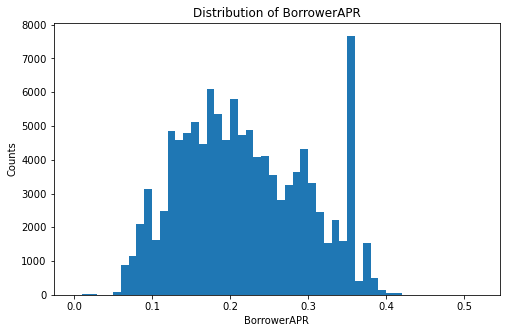

In [25]:
plt.figure(figsize = [8,5])
bins = np.arange(0, data["BorrowerAPR"].max() + 0.01, 0.01)
plt.hist(data = data, x = "BorrowerAPR", bins = bins)
plt.title('Distribution of BorrowerAPR')
plt.xlabel('BorrowerAPR')
plt.ylabel('Counts');

>  The distribution has a spike between 0.3 and 0.4 and its slightly skewed to the right

#### Distribution of BorrowerRate

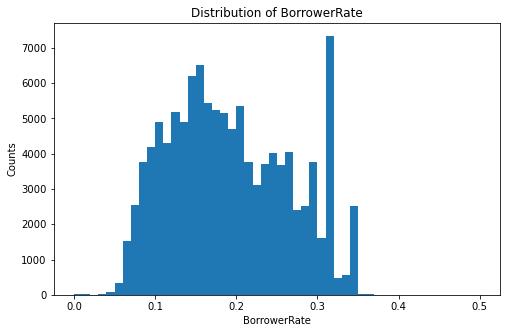

In [26]:
plt.figure(figsize = [8,5])
bins = np.arange(0, data["BorrowerRate"].max() + 0.01, 0.01)
plt.hist(data = data, x = "BorrowerRate", bins = bins)
plt.title('Distribution of BorrowerRate')
plt.xlabel('BorrowerRate')
plt.ylabel('Counts');

> The distribution has a spike around 0.31 and its slightly skewed to the right

The **BorrowerRate** (interest rate) refers to the annual cost of a loan to  a borrower and is expressed as a percentage. The interest rate does not  include fees charged for the loan. 

The **BorrowerAPR** is the annual cost of a loan to a borrower. Unlike an interest rate, it includes other charges or fees (such as mortgage  insurance, most closing costs, discount points and loan origination  fees) to reflect the total cost of the loan.

According to above definitions by [Bank of America](https://www.bankofamerica.com/mortgage/learn/apr-vs-interest-rate/),  the distribution of BorrowerAPR and BorrowerRate should be similar with  slight difference since the APR is always higher than the interest rate.

#### Distribution of ProsperRating(Numeric)

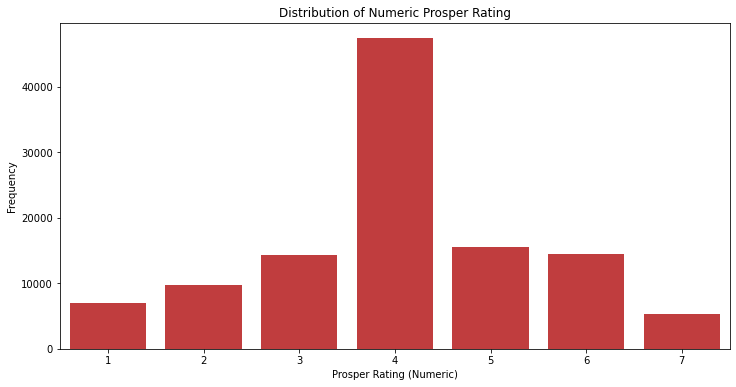

In [27]:
plt.figure(figsize = (12, 6))
sb.countplot(data = data, x = "ProsperRating (numeric)", color = sb.color_palette()[3])

plt.title("Distribution of Numeric Prosper Rating")
plt.xlabel("Prosper Rating (Numeric)")
plt.ylabel("Frequency")

plt.show()

In [28]:
order = ["HR", "E", "D", "C", "B", "A", "AA"]

# For reproducability
pd_ver = pd.__version__.split(".")

if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21):
    rating = pd.api.types.CategoricalDtype(ordered = True, categories = order)
    data["ProsperRating (Alpha)"] = data["ProsperRating (Alpha)"].astype(rating)
else:
    data["ProsperRating (Alpha)"] = data["ProsperRating (Alpha)"].astype("category", ordered = True, categories = order)

#### Distribution of ProsperRating (Alpha)

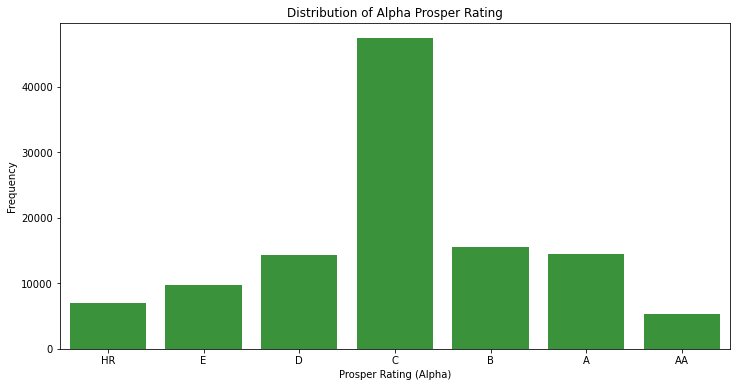

In [29]:
plt.figure(figsize = (12, 6))
sb.countplot(data = data, x = "ProsperRating (Alpha)", color = sb.color_palette()[2])

plt.title("Distribution of Alpha Prosper Rating")
plt.xlabel("Prosper Rating (Alpha)")
plt.ylabel("Frequency")

plt.show()

> The **Prosper Rating (Alpha)** and **Prosper Rating (Numeric)** are identical, the alpha column is just a alphabetic representation of the numeric column. Rating 4 has the highest frequency. The rating was increasing till it got to 4 then it also steadily decreased from 4

#### Distribution of ProsperScore

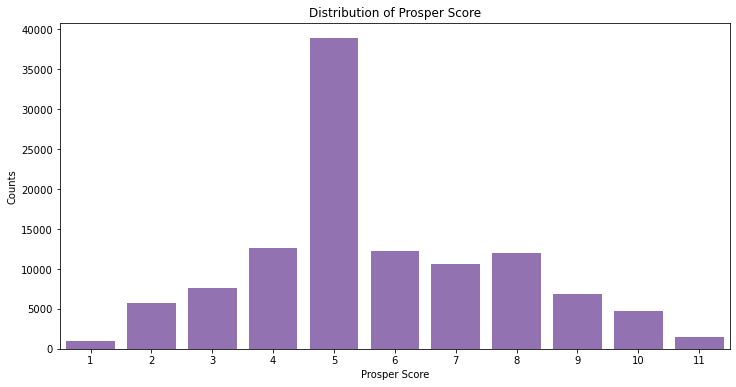

In [30]:
plt.figure(figsize = (12, 6))
sb.countplot(data = data, x = "ProsperScore", color = sb.color_palette()[4])

plt.title("Distribution of Prosper Score")
plt.xlabel("Prosper Score")
plt.ylabel("Counts")

plt.show()

> The **Prosper Score** has a distribution identical to the Prosper Rating in the way it increases to the modal value and decreases after the modal value.

#### Distribution of Employment Status

In [31]:
order = data["EmploymentStatus"].value_counts().index

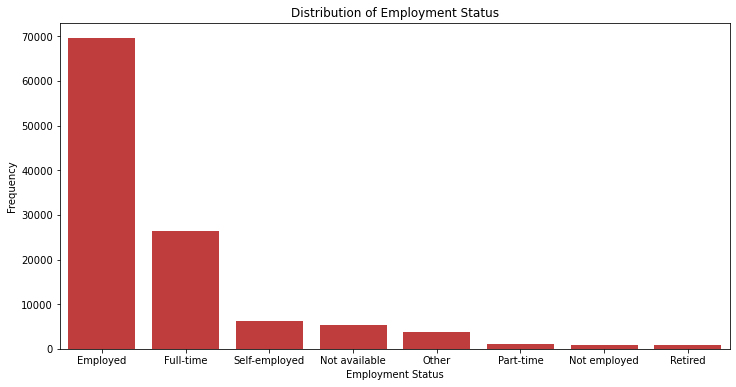

In [32]:
plt.figure(figsize = (12, 6))
sb.countplot(data = data, x = "EmploymentStatus", color = sb.color_palette()[3], order = order)

plt.title("Distribution of Employment Status")
plt.xlabel("Employment Status")
plt.ylabel("Frequency")

plt.show()

> The distribution of **EmploymentStatus** showed that Employed people tend to apply for loan more than others. This may be because of the missing values of those features were filled with their mode but that just implies that they were already leading results in said features.

#### Distribution of Loan Original Amount

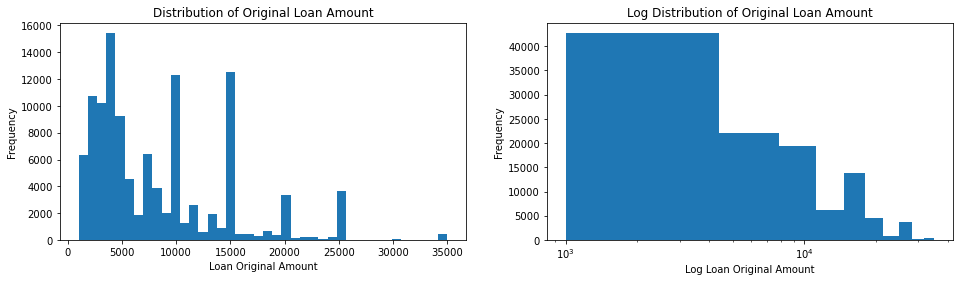

In [33]:
plt.figure(figsize = (16, 4))

plt.subplot(1, 2, 1)
plt.hist(data = data, x = "LoanOriginalAmount", bins = 40)

plt.title("Distribution of Original Loan Amount")
plt.xlabel("Loan Original Amount")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(data = data, x = "LoanOriginalAmount")

plt.title("Log Distribution of Original Loan Amount")
plt.xscale("log")
plt.xlabel("Log Loan Original Amount")
plt.ylabel("Frequency")

plt.show()

> The distribution of **LoanOriginalAmount** is not skewed. Even with a log transformation, there is no change. 
There is a high frequency with an origination amount of about 4000 - 5000

#### Distribution of Total Trades

In [34]:
bins = np.arange(0, data["TotalTrades"].max() + 3, 3)

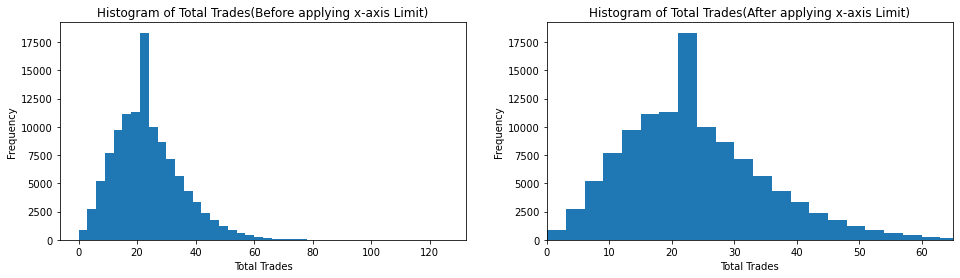

In [35]:
plt.figure(figsize = (16, 4))
plt.subplot(1, 2, 1)
plt.title("Histogram of Total Trades(Before applying x-axis Limit)")
plt.hist(data = data, x = "TotalTrades", bins = bins)

plt.xlabel("Total Trades")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.title("Histogram of Total Trades(After applying x-axis Limit)")
plt.hist(data = data, x = "TotalTrades", bins = bins)

plt.xlabel("Total Trades")
plt.xlim(0, 65)
plt.ylabel("Frequency")

plt.show()

> While the distribution of **TotalTrades** was skewed to the right, it still showed that most people tended to have trade lines of between 20 - 25.

#### Distribution of Monthly Loan Payment

In [36]:
bins = np.arange(0, data["MonthlyLoanPayment"].max() + 30, 30)

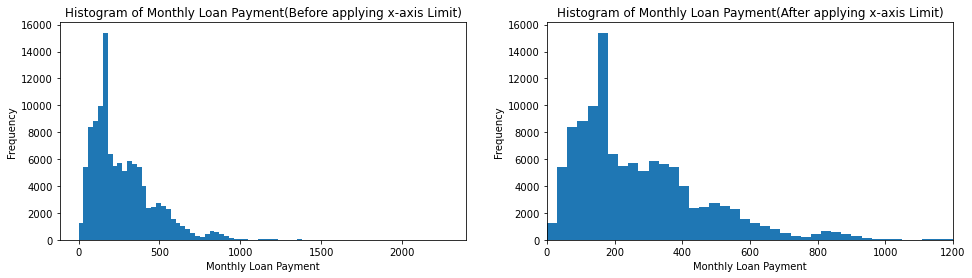

In [37]:
plt.figure(figsize = (16, 4))

plt.subplot(1, 2, 1)
plt.hist(data = data, x = "MonthlyLoanPayment", bins = bins)

plt.title("Histogram of Monthly Loan Payment(Before applying x-axis Limit)")
plt.xlabel("Monthly Loan Payment")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.title("Histogram of Monthly Loan Payment(After applying x-axis Limit)")
plt.hist(data = data, x = "MonthlyLoanPayment", bins = bins)

plt.xlabel("Monthly Loan Payment")
plt.xlim(0, 1200)
plt.ylabel("Frequency")

plt.show()

> From the distribution of **Monthly Loan Payment** it can be discovered that most of Prosper monthly loan payment are less than  1,000 \($\), which indicates that prosper's services are mainly on personal loans.

<a id='bivariate'></a>
### Bivariate Exploration

#### Relationship between Prosper Score and Borrower APR 

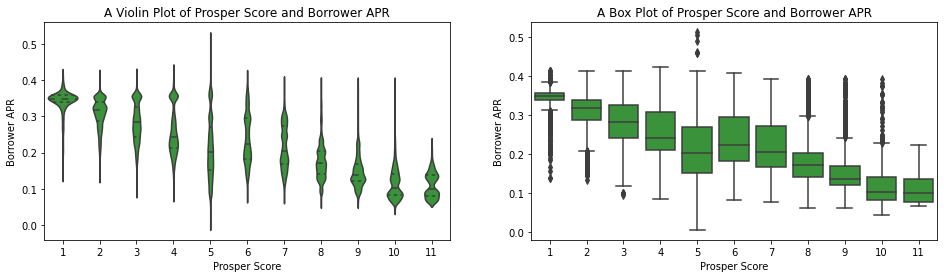

In [38]:
plt.figure(figsize = (16, 4))

plt.subplot(1, 2, 1)
plt.title("A Violin Plot of Prosper Score and Borrower APR")
sb.violinplot(data = data, x = "ProsperScore", y = "BorrowerAPR", inner = "quartile", color = sb.color_palette()[2])

plt.xlabel("Prosper Score")
plt.ylabel("Borrower APR")

plt.subplot(1, 2, 2)
plt.title("A Box Plot of Prosper Score and Borrower APR")
sb.boxplot(data = data, x = "ProsperScore", y = "BorrowerAPR", color = sb.color_palette()[2])

plt.xlabel("Prosper Score")
plt.ylabel("Borrower APR")

plt.show()

> The above visualization shows the relationship between the Prosper Score and Borrower APR. It shows that:
> - Prosper Score (5) had a wider range of Borrower APR and the lowest Borrower APR of all the Score. 
> - Prosper Score 4 had the highest Borrower APR. 
> - There were a lot of outliers in Prosper Score 1 and it also had the lowest range of Borrower APR.

#### Relationship between Prosper Rating and Employment Status

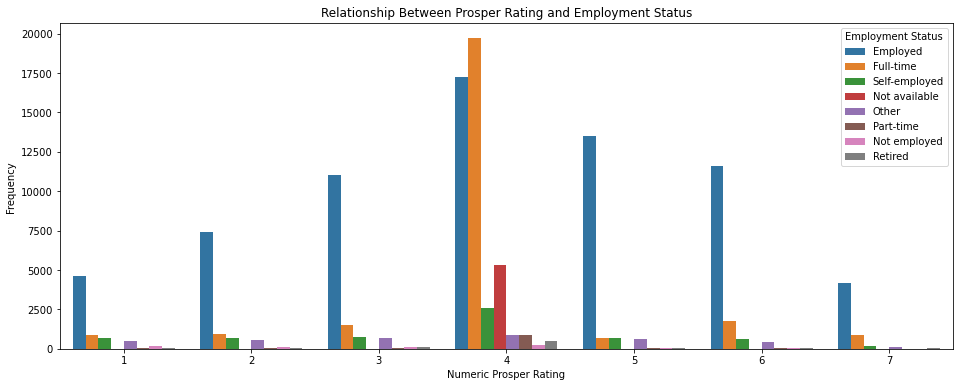

In [39]:
plt.figure(figsize = (16, 6))

sb.countplot(data = data, x = "ProsperRating (numeric)", hue = "EmploymentStatus", hue_order = order)

plt.title("Relationship Between Prosper Rating and Employment Status")
plt.xlabel("Numeric Prosper Rating")
plt.ylabel("Frequency ")

plt.legend(title = "Employment Status")
plt.show()

#### Relationship between Prosper Score and Employment Status

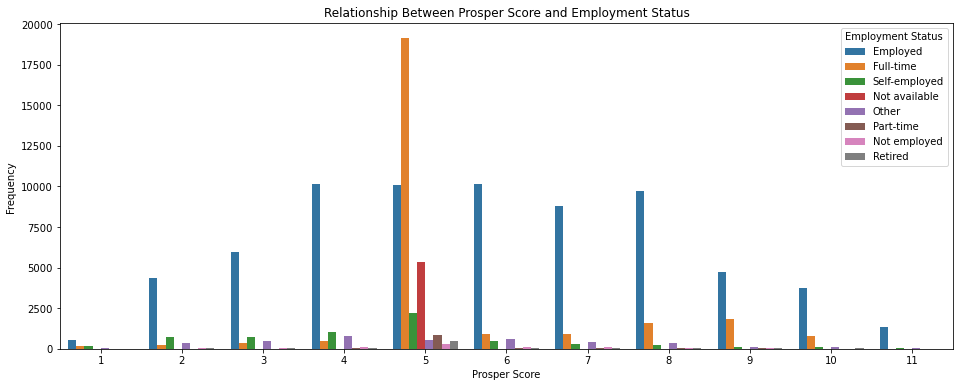

In [40]:
plt.figure(figsize = (16, 6))

sb.countplot(data = data, x = "ProsperScore", hue = "EmploymentStatus", hue_order = order)

plt.title("Relationship Between Prosper Score and Employment Status")
plt.xlabel("Prosper Score")
plt.ylabel("Frequency ")

plt.legend(title = "Employment Status", loc = "upper right")

plt.show()

> The above visualizations shows the relationship between the **Numeric Prosper Rating** and **Prosper Score** against **Employment Status**. It shows that for every Rating and Score, `Employed` people made up most of the consideration. `Not available` and `Part-time` made up the least except in the Rating `4` and Score `5` where `Full-time` makes the highest consideration and `Not available` also made a considerable portion compared to others.

#### Relationship Between Prosper Score and Income Verifiable

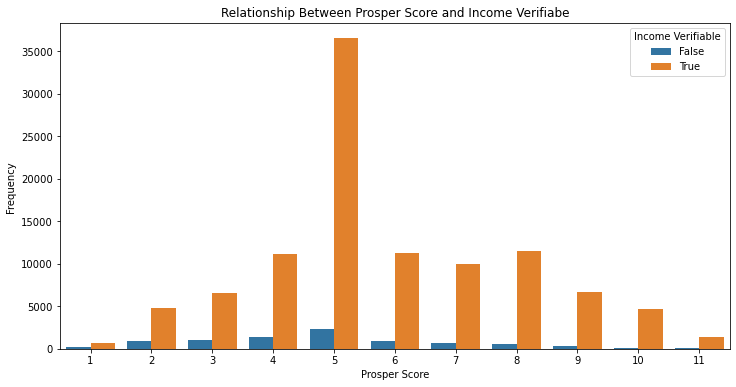

In [42]:
plt.figure(figsize = (12, 6))
sb.countplot(data = data, x = "ProsperScore", hue = "IncomeVerifiable")

plt.title("Relationship Between Prosper Score and Income Verifiabe")
plt.xlabel("Prosper Score")
plt.ylabel("Frequency ")

plt.legend(title = "Income Verifiable")

plt.show()

#### Relationship between Prosper Score, Prosper Rating and Borrower Rate

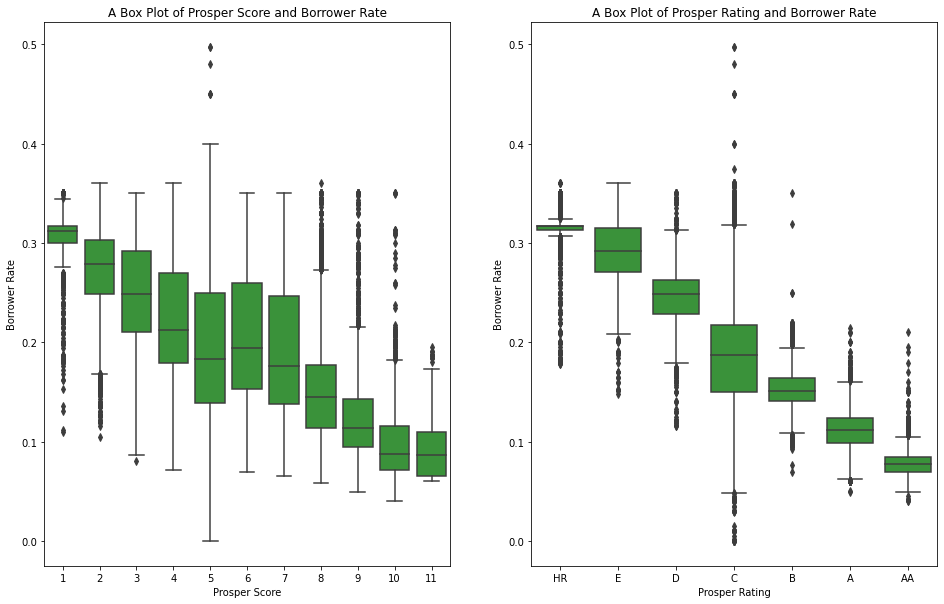

In [53]:
plt.figure(figsize = (16, 10))

plt.subplot(1, 2, 1)
plt.title("A Box Plot of Prosper Score and Borrower Rate")
sb.boxplot(data = data, x = "ProsperScore", y = "BorrowerRate", color = sb.color_palette()[2])

plt.xlabel("Prosper Score")
plt.ylabel("Borrower Rate")

plt.subplot(1, 2, 2)
plt.title("A Box Plot of Prosper Rating and Borrower Rate")
sb.boxplot(data = data, x = "ProsperRating (Alpha)", y = "BorrowerRate", color = sb.color_palette()[2])

plt.xlabel("Prosper Rating")
plt.ylabel("Borrower Rate")

plt.show()

> The plot show strong correlation between the **Prosper rating** or **Prosper score** with the  **Borrower Rate**. Generally, borrowers have no clue on their prosper scores.  So these information can not be included in our model.

#### Relationship Between Prosper Score and Prosper Rating

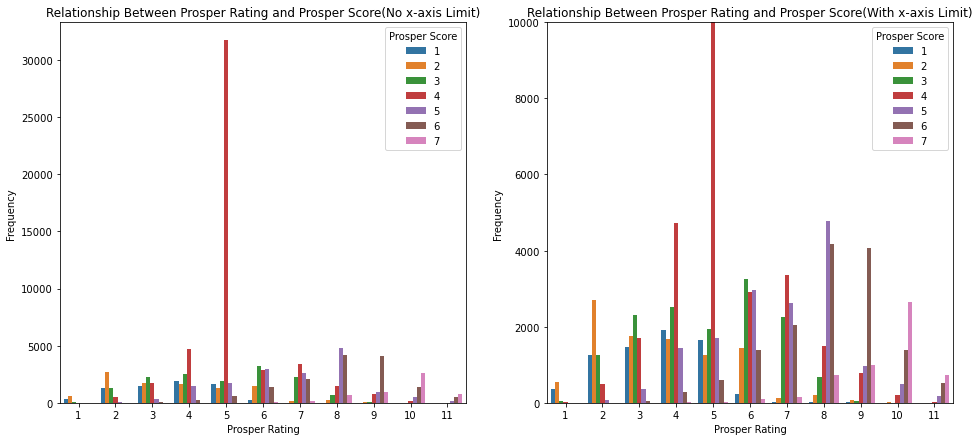

In [57]:
plt.figure(figsize = (16, 7))

plt.subplot(1, 2, 1)
sb.countplot(data = data, x = "ProsperScore", hue = "ProsperRating (numeric)")

plt.title("Relationship Between Prosper Rating and Prosper Score(No x-axis Limit)")
plt.xlabel("Prosper Rating")
plt.ylabel("Frequency ")

plt.legend(title = "Prosper Score", loc = "upper right")

plt.subplot(1, 2, 2)
sb.countplot(data = data, x = "ProsperScore", hue = "ProsperRating (numeric)")

plt.title("Relationship Between Prosper Rating and Prosper Score(With x-axis Limit)")
plt.xlabel("Prosper Rating")
plt.ylabel("Frequency ")
plt.ylim(0, 10000)

plt.legend(title = "Prosper Score", loc = "upper right")

plt.show()

> The above visualization shows the relationship between **Prosper Rating** and **Prosper Score**. Each Rating had varying levels of Score but Rating 5 had the highest Score of 4. I also noticed that Scores 8, 9, 10, 11 had no relationhip with the Ratings.

#### Relationship between Prosper Rating and Monthly Loan Payment

In [61]:
bins = np.arange(0, data["MonthlyLoanPayment"].max() + 30, 30)

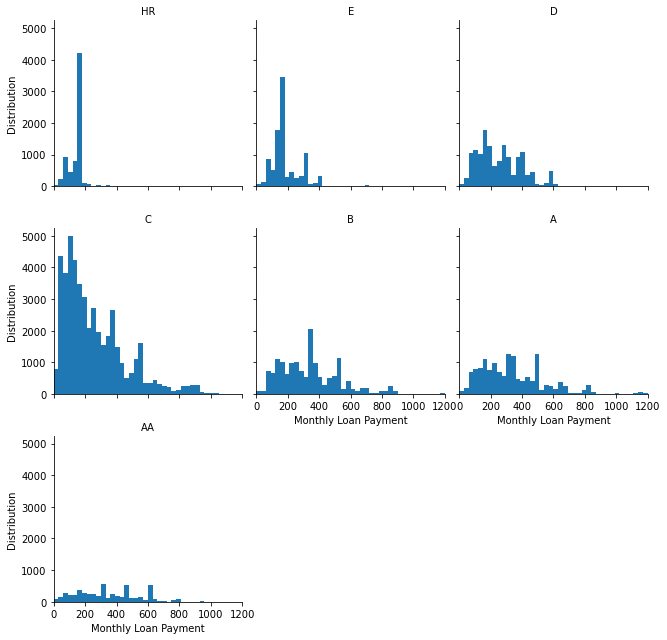

In [62]:
g = sb.FacetGrid(data = data, col = "ProsperRating (Alpha)", col_wrap = 3)
g.map(plt.hist, "MonthlyLoanPayment", bins = bins)
g.set_titles("{col_name}")

g.set(xlim = (0, 1200))
g.set_xlabels("Monthly Loan Payment")
g.set_ylabels("Distribution")

plt.show()

> The above visualization shows the distribution of **Monthly Loan Payment** for each **Prosper Rating (Alpha)**. It shows that Rating `C` had the most occurence of Monthly Loan Payment.

### Relationship Between Main Features

> My main features showed some interesting relationships with themselves and other features. I observed that Prosper Rating influenced one's Prosper Score. The max Borrower APR tended to decrease as Prosper Score increased.

### Relationship Between Other Features

> Employed people made up the highest composition of Ratings and also had better Ratings than others as did Income Verification wih Prosper Score. I also observed that the number of Trade Lines a person has positively influences their Credit Lines.

<a id='multivariate'></a>
### Multivariate Exploration

#### Relationship Between Prosper Score, Borrower APR and Income Verifiable

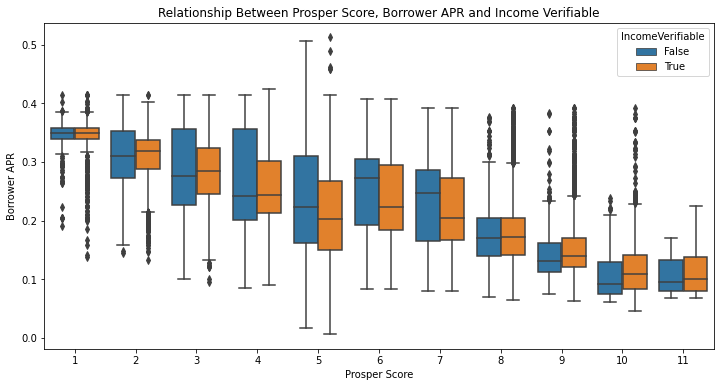

In [64]:
plt.figure(figsize = (12, 6))
sb.boxplot(data = data, x = "ProsperScore", y = "BorrowerAPR", hue = "IncomeVerifiable")

plt.title("Relationship Between Prosper Score, Borrower APR and Income Verifiable")
plt.xlabel("Prosper Score")
plt.ylabel("Borrower APR")

plt.show()

## Conclusions
> - The distribution of **BorrowerAPR** looks normal but with a spike in value at around 0.3 - 0.4
> - The **prosper Score**, **Prosper Rating (Alpha)** and **Prosper Rating (Numeric)** are identical, the alpha column is just a alphabetic representation of the numeric column. Rating 4 has the highest frequency. The rating was increasing till it got to 4 then it also steadily decreased from 4.
> - The distribution of **EmploymentStatus** showed that Employed people tend to apply for loan more than others. This may be because of the missing values of those features were filled with their mode but that just implies that they were already leading results in said features.
> - The distribution of **LoanOriginalAmount** is not skewed. Even with a log transformation, there is no change. There is a high frequency with an origination amount of about 4000 - 5000
> - While the distribution of **TotalTrades** was skewed to the right, it still showed that most people tended to have trade lines of between 20 - 25.
> - From the distribution of **Monthly Loan Payment** it can be discovered that most of Prosper monthly loan payment are less than 1,000 \($\), which indicates that prosper's services are mainly on personal loans.
> From the relationship between the **Prosper Score** and **Borrower APR**. It shows that:
> - Prosper Score (5) had a wider range of Borrower APR and the lowest Borrower APR of all the Score. 
> - Prosper Score 4 had the highest Borrower APR. 
> - There were a lot of outliers in Prosper Score 1 and it also had the lowest range of Borrower APR.
> - The above visualizations shows the relationship between the **Numeric Prosper Rating** and **Prosper Score** against **Employment Status**. It shows that for every Rating and Score, `Employed` people made up most of the consideration. `Not available` and `Part-time` made up the least except in the Rating `4` and Score `5` where `Full-time` makes the highest consideration and `Not available` also made a considerable portion compared to others.
> - The plot show strong correlation between the **Prosper rating** or **Prosper score** with the  **Borrower Rate**. Generally, borrowers have no clue on their prosper scores.  So these information can not be included in our model.
> - The above visualization shows the relationship between **Prosper Rating** and **Prosper Score**. Each Rating had varying levels of Score but Rating 5 had the highest Score of 4. I also noticed that Scores 8, 9, 10, 11 had no relationhip with the Ratings.
> - The above visualization shows the distribution of **Monthly Loan Payment** for each **Prosper Rating (Alpha)**. It shows that Rating `C` had the most occurence of Monthly Loan Payment.